In [9]:
import pandas as pd# It is used for data manipulation for data cleaning purposes,even it is helpful to treat missing values
import seaborn as sns# visualisation library based on matplotlib
from scipy.stats import skew 
from scipy.stats import kurtosis
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
import numpy as np
# Load the Diamonds dataset
diamonds_data = sns.load_dataset("diamonds")

# Display the first few rows of the dataset
diamonds_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
diamonds_data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
diamonds_data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [12]:
diamonds_data.shape

(53940, 10)

In [20]:
diamonds_data.carat.value_counts()

carat
0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
3.02       1
3.65       1
3.50       1
3.22       1
3.11       1
Name: count, Length: 273, dtype: int64

In [21]:
diamonds_data.cut.value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [22]:
diamonds_data.color.value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [23]:
diamonds_data.clarity.value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [24]:
diamonds_data.depth.value_counts()

depth
62.0    2239
61.9    2163
61.8    2077
62.2    2039
62.1    2020
        ... 
71.3       1
44.0       1
53.0       1
53.1       1
54.7       1
Name: count, Length: 184, dtype: int64

In [25]:
diamonds_data.table.value_counts()

table
56.0    9881
57.0    9724
58.0    8369
59.0    6572
55.0    6268
        ... 
51.6       1
63.5       1
43.0       1
62.4       1
61.6       1
Name: count, Length: 127, dtype: int64

In [26]:
diamonds_data.price.value_counts()

price
605      132
802      127
625      126
828      125
776      124
        ... 
8816       1
14704      1
14699      1
14698      1
9793       1
Name: count, Length: 11602, dtype: int64

In [27]:
diamonds_data.x.value_counts()

x
4.37     448
4.34     437
4.33     429
4.38     428
4.32     425
        ... 
10.74      1
9.36       1
8.89       1
10.23      1
10.00      1
Name: count, Length: 554, dtype: int64

In [28]:
diamonds_data.y.value_counts()

y
4.34     437
4.37     435
4.35     425
4.33     421
4.32     414
        ... 
8.89       1
10.16      1
9.46       1
9.63       1
31.80      1
Name: count, Length: 552, dtype: int64

In [29]:
diamonds_data.z.value_counts()

z
2.70     767
2.69     748
2.71     738
2.68     730
2.72     697
        ... 
5.79       1
5.72       1
5.91       1
5.61       1
31.80      1
Name: count, Length: 375, dtype: int64

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

<Axes: >

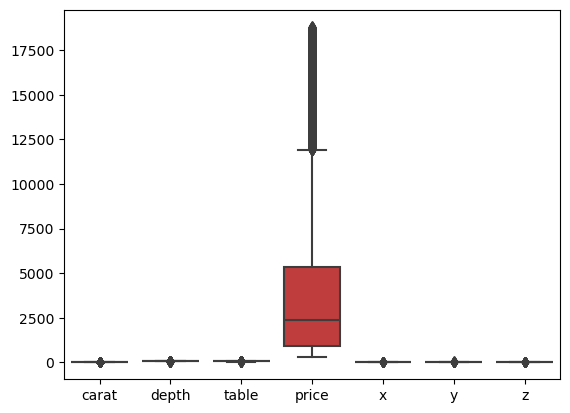

In [13]:
sns.boxplot(diamonds_data)

/var/folders/x_/bydwqxmj22b17_nc_zdgjlhc0000gn/T/ipykernel_94557/346902044.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diamonds_data["price"])
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf

<Axes: xlabel='price', ylabel='Density'>

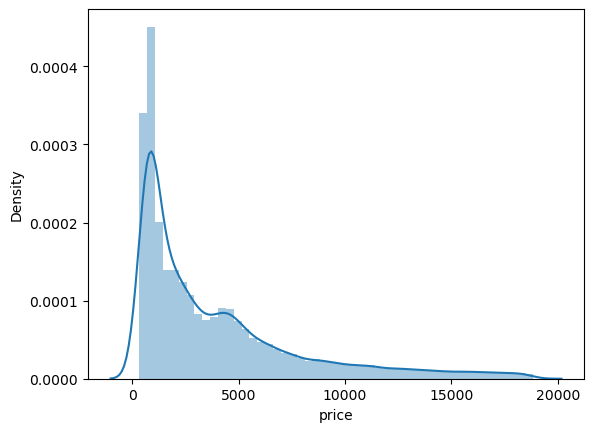

In [14]:
sns.distplot(diamonds_data["price"])

/var/folders/x_/bydwqxmj22b17_nc_zdgjlhc0000gn/T/ipykernel_94557/964490455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diamonds_data["table"])
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf

<Axes: xlabel='table', ylabel='Density'>

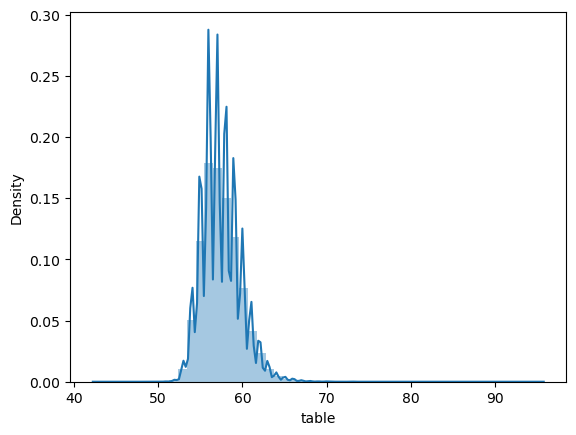

In [15]:
sns.distplot(diamonds_data["table"])

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='price', ylabel='carat'>

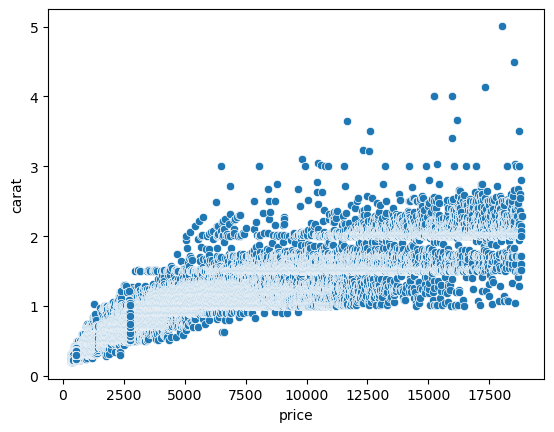

In [33]:
sns.scatterplot(x='price',y='carat',data=diamonds_data)#carat has central tendency from 1 to 3 and price is distributed majorly accross 5000 to 17500, with the increse of carat price is increasing as well and vice versa hence they are positively correlated   

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='cut', ylabel='price'>

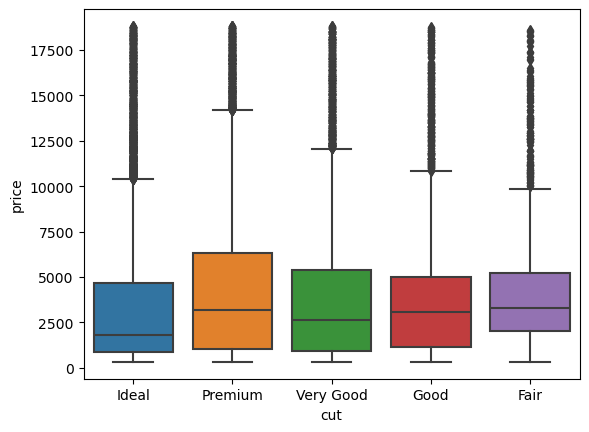

In [34]:
sns.boxplot(x="cut",y="price",data=diamonds_data)

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='cut', ylabel='price'>

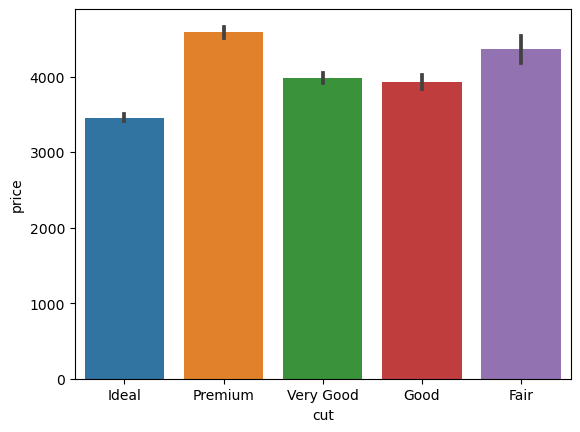

In [35]:
sns.barplot(x="cut",y="price",data=diamonds_data)

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='clarity', ylabel='price'>

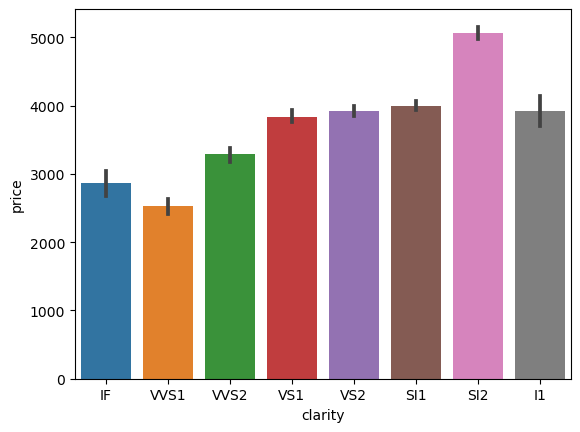

In [37]:
sns.barplot(x="clarity",y="price",data=diamonds_data)

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='color', ylabel='price'>

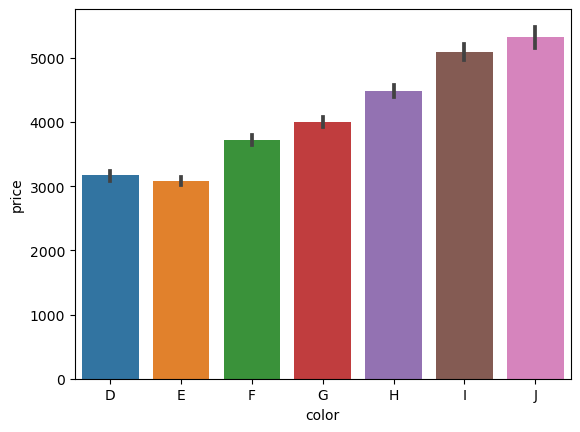

In [38]:
sns.barplot(x="color",y="price",data=diamonds_data)

In [39]:
le=LabelEncoder()#saving the instance

In [40]:
diamonds_data["cut_new"]=le.fit_transform(diamonds_data["cut"])

In [41]:
diamonds_data["color_new"]=le.fit_transform(diamonds_data["color"])

In [42]:
diamonds_data["clarity_new"]=le.fit_transform(diamonds_data["clarity"])

In [43]:
diamonds_data

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_new,color_new,clarity_new
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,1,3
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,1,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,1,4
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,5,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2,0,2
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1,0,2
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,4,0,2
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3,4,3


In [44]:
diamonds_data.drop("cut",axis=1,inplace=True)

In [45]:
diamonds_data.drop("color",axis=1,inplace=True)

In [46]:
diamonds_data.drop("clarity",axis=1,inplace=True)

In [47]:
diamonds_data

,carat,depth,table,price,x,y,z,cut_new,color_new,clarity_new
0,0.23,61.5,55.0,326,3.95,3.98,2.43,2,1,3
1,0.21,59.8,61.0,326,3.89,3.84,2.31,3,1,2
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,1,4
3,0.29,62.4,58.0,334,4.20,4.23,2.63,3,5,5
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,6,3
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,2,0,2
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,2
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,4,0,2
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,3,4,3


In [48]:
diamonds_data.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_new',
       'color_new', 'clarity_new'],
      dtype='object')

In [49]:
x=diamonds_data.drop('cut_new',axis=1)
y=diamonds_data['cut_new']

In [50]:
scaler=MinMaxScaler()#saving the instance
scaled_data=scaler.fit_transform(x)
scaled_data=pd.DataFrame(scaled_data,columns=x.columns)
scaled_data

,carat,depth,table,price,x,y,z,color_new,clarity_new
0,0.006237,0.513889,0.230769,0.000000,0.367784,0.067572,0.076415,0.166667,0.428571
1,0.002079,0.466667,0.346154,0.000000,0.362197,0.065195,0.072642,0.166667,0.285714
2,0.006237,0.386111,0.423077,0.000054,0.377095,0.069100,0.072642,0.166667,0.571429
3,0.018711,0.538889,0.288462,0.000433,0.391061,0.071817,0.082704,0.833333,0.714286
4,0.022869,0.563889,0.288462,0.000487,0.404097,0.073854,0.086478,1.000000,0.428571
...,...,...,...,...,...,...,...,...,...
53935,0.108108,0.494444,0.269231,0.131427,0.535382,0.097793,0.110063,0.000000,0.285714
53936,0.108108,0.558333,0.230769,0.131427,0.529795,0.097623,0.113522,0.000000,0.285714
53937,0.103950,0.550000,0.326923,0.131427,0.527002,0.096435,0.111950,0.000000,0.285714
53938,0.137214,0.500000,0.288462,0.131427,0.572626,0.103905,0.117610,0.666667,0.428571


In [51]:
x_train,x_test,y_train,y_test=train_test_split(scaled_data,y,test_size=0.2,random_state=0)

In [52]:
x_train,x_test,y_train,y_test

(          carat     depth     table     price         x         y         z  \
 26250  0.297297  0.519444  0.230769  0.831000  0.703911  0.129032  0.147170   
 31510  0.029106  0.533333  0.269231  0.023734  0.416201  0.075382  0.087107   
 40698  0.041580  0.519444  0.250000  0.044980  0.440410  0.080985  0.092138   
 42634  0.079002  0.530556  0.230769  0.054387  0.500931  0.090832  0.104717   
 47714  0.089397  0.550000  0.269231  0.084284  0.502793  0.092699  0.107233   
 ...         ...       ...       ...       ...       ...       ...       ...   
 45891  0.066528  0.491667  0.307692  0.075364  0.482309  0.087267  0.098428   
 52416  0.103950  0.572222  0.326923  0.118181  0.520484  0.093548  0.110377   
 42613  0.024948  0.508333  0.288462  0.009677  0.405028  0.074533  0.084277   
 43567  0.043659  0.500000  0.269231  0.059739  0.447858  0.081324  0.092138   
 2732   0.147609  0.502778  0.230769  0.157863  0.581006  0.105093  0.119497   
 
        color_new  clarity_new  
 2625

In [53]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
y_pred=lr.predict(x_test)
y_pred

array([2, 2, 3, ..., 2, 2, 4])

In [55]:
y_pred.shape

(10788,)

In [56]:
y_test

10176    2
16083    2
13420    3
20407    2
8909     4
        ..
42208    1
3638     4
5508     4
19535    2
47950    1
Name: cut_new, Length: 10788, dtype: int64

In [57]:
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.5995550611790879

In [58]:
precision=precision_score(y_pred,y_test,average='macro')
precision

0.4070403979191576

In [59]:
recall1=recall_score(y_pred,y_test,average='micro')
recall1

0.5995550611790879

In [60]:
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[  49,  100,   40,   60,   71],
       [   3,   77,  272,  352,  279],
       [   0,    1, 3996,  187,   75],
       [   2,    1,  549, 1873,  365],
       [   1,   16,  993,  953,  473]])

In [61]:
classification_report_logistic=classification_report(y_test,y_pred)
print(classification_report_logistic)

              precision    recall  f1-score   support

           0       0.89      0.15      0.26       320
           1       0.39      0.08      0.13       983
           2       0.68      0.94      0.79      4259
           3       0.55      0.67      0.60      2790
           4       0.37      0.19      0.26      2436

    accuracy                           0.60     10788
   macro avg       0.58      0.41      0.41     10788
weighted avg       0.56      0.60      0.55     10788



In [62]:
train_score=lr.score(x_train,y_train)
train_score

0.5986744530960326

In [63]:
test_score=lr.score(x_test,y_test)
test_score

0.5995550611790879